<a href="https://colab.research.google.com/github/00Huang/Python-/blob/main/%E4%BD%BF%E7%94%A8%E3%80%8E%E6%B1%BA%E7%AD%96%E6%A8%B9tree%E3%80%8F%E6%A8%A1%E5%9E%8B%E4%BE%86%E9%A0%90%E6%B8%AC%E3%80%8E%E5%AE%A2%E6%88%B6%E9%97%9C%E4%BF%82%E7%AE%A1%E7%90%86%E8%A3%A1%E9%9D%A2%E7%9A%84%E5%AE%A2%E6%88%B6%E5%83%B9%E5%80%BC%E5%BA%A6%E3%80%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#載入資料集
import pandas as pd
t1 = "customers"
df = pd.read_excel("https://acupun.site/lecture/predict/example/resource/RFM-2-chi.xlsx", t1)
df

,編號,性別,R,F,M,客戶價值文字,客戶價值數值
0,0S3670071489,F,586,1,1380,低,0
1,0S3687895473,M,12,1,1186,低,0
2,0S3690675977,F,75,2,2850,高,1
3,2009S2044237,F,657,1,1099,低,0
4,2009S2044261,M,145,1,1360,低,0
...,...,...,...,...,...,...,...
43667,S201S242852053,F,211,1,678,低,0
43668,S201S280812053,F,109,2,3120,高,1
43669,S201S280816053,M,313,1,780,低,0
43670,S201S280840053,M,33,1,150,低,0


In [2]:
#切分為訓練集/測試集
import sklearn.model_selection as msel
x_train, x_test, y_train, y_test = msel.train_test_split(
    df[["R","F","M"]],
    df["客戶價值數值"],
    test_size=0.2
    )
x_train

,R,F,M
21921,539,1,2419
39496,62,1,1080
18381,321,7,6997
15331,220,2,2810
12404,658,1,1380
...,...,...,...
21278,554,1,1280
6250,110,1,150
12278,458,1,289
26626,131,3,2159


In [3]:
#測試資料集
y_test

11595    0
21204    0
42110    1
1523     1
28156    0
        ..
11536    1
20571    0
29133    0
40909    0
7371     0
Name: 客戶價值數值, Length: 8735, dtype: int64

In [4]:
#建立數學模型
import sklearn.tree as tree
model = tree.DecisionTreeClassifier()

In [5]:
#學習歷史數據
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [7]:
#進行預測（A顧客的【R,F,M】=5,2,2100，請預測A顧客是否為本公司的重要客戶？）
model.predict([[5,2,2100]])
if model.predict([[5,2,2100]]) == 0:
  print("A顧客不是本公司的重要客戶")
else:
  print("A顧客是本公司的重要客戶")

A顧客不是本公司的重要客戶


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [10]:
#計算整體模型準確率
import sklearn.metrics as mts
y_pred = model.predict(x_test)
mts.accuracy_score(y_test, y_pred)

0.9987406983400114

In [11]:
#『混淆矩陣』
import sklearn.metrics as mts
arr1 = mts.confusion_matrix(y_test, y_pred)
#把矩陣array轉成dataframe
df_confuse = pd.DataFrame(arr1, columns=["預測0","預測1"], index=["實際0","實際1"])
df_confuse

,預測0,預測1
實際0,6629,3
實際1,8,2095


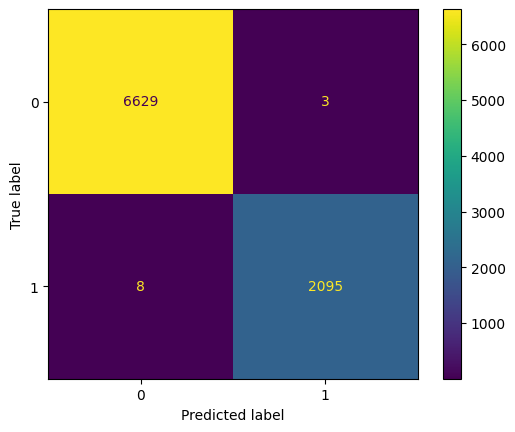

In [12]:
import sklearn.metrics as mts
mts.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [13]:
#classification_report
import sklearn.metrics as mts
y_pred = model.predict(x_test)
report1 = mts.classification_report(y_test, y_pred)
print(report1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6632
           1       1.00      1.00      1.00      2103

    accuracy                           1.00      8735
   macro avg       1.00      1.00      1.00      8735
weighted avg       1.00      1.00      1.00      8735

